# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Exercise 7 </span>
### <span style="color:blue"> Exercise 7.1 </span>

In this section we studied autocorrelation and error for both Energy (per particle) and Pressure in the 3 thermodynamic states stated in the lecture notebook.<br>
In the first place, we get the system to equilibrium (delta 0.1 for the solid phase, 0.2 for liquid and 3.0 for the gas).<br>
Then we plot the autocorrelation function,fitted with a decreasing exponential.<br>
Error roughly increases with block size as we expected.

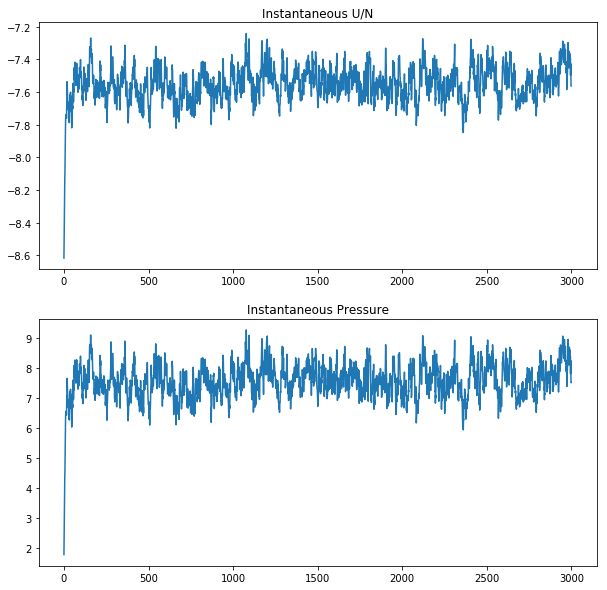

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.loadtxt("MonteCarlo_NVT/output.inst")

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
y_e = x[:,1]
y_p = x[:,2]
x = np.arange(len(y_e))

axs[0].plot(x,y_e)
axs[1].plot(x,y_p)

axs[0].set_title('Instantaneous U/N')
axs[1].set_title('Instantaneous Pressure')

plt.show()

In [4]:
def AutoCorrelation(x, tau):
    lenght = len(x)-tau
    x_t=0
    x_tT=0
    x_xT=0
    x_2=0
    for t in range(lenght):
        x_t  += x[t]
        x_tT += x[t+tau]
        x_xT += x[t]*x[t+tau]
        x_2  += x[t]**2
    x_t  = x_t/lenght
    x_tT = x_tT/lenght
    x_xT = x_xT/lenght
    x_2  = x_2/lenght
    return (x_xT-x_t*x_tT)/(x_2-x_t**2)

### Solid

In [6]:
from scipy.optimize import curve_fit

def f(x,a):
    return np.exp(-a*x)

Energy exp-fit parameter: 
[0.11553935]
Pressure exp-fit parameter: 
[0.11744169]


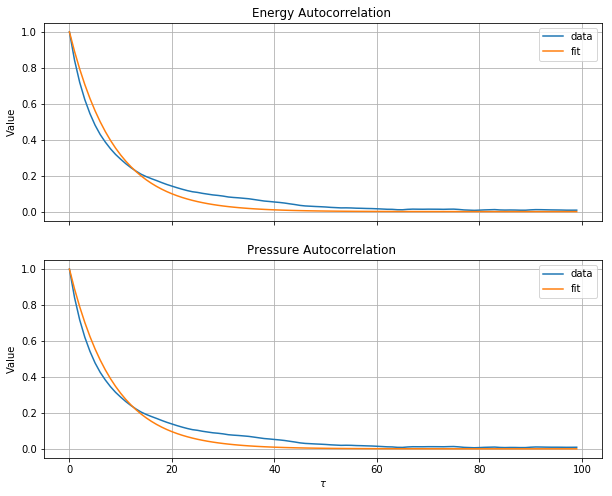

In [27]:
e = np.loadtxt("Solido/output.epot.0")
p = np.loadtxt("Solido/output.pres.0")

y_e = e[:,1]
y_p = p[:,1]

acU = []
acP = []
for tau in range(100):
        acU.append(AutoCorrelation(y_e,tau))
        acP.append(AutoCorrelation(y_p,tau))

x = np.arange(len(acU))
p_opt, p_cov = curve_fit(f, x, acU)
print("Energy exp-fit parameter: ")
print(p_opt)
fit = f(x,p_opt)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=False,
                        tight_layout=False)
  
axs[0].plot(x,acU, label="data") # plotting noisy data
axs[0].plot(x,fit, label="fit") # plotting fitted function

p_optp, p_covp = curve_fit(f, x, acP)
print("Pressure exp-fit parameter: ")
print(p_optp)
fit = f(x,p_optp)

axs[1].plot(x,acP, label="data") # plotting noisy data
axs[1].plot(x,fit, label="fit") # plotting fitted function

#axs[0].set_xlabel(r'$\tau$')
axs[0].set_ylabel('Value')
axs[1].set_xlabel(r'$\tau$')
axs[1].set_ylabel('Value')

axs[0].set_title('Energy Autocorrelation ')
axs[1].set_title('Pressure Autocorrelation ')

axs[0].legend()
axs[0].grid(True)
axs[1].legend()
axs[1].grid(True)

plt.show()

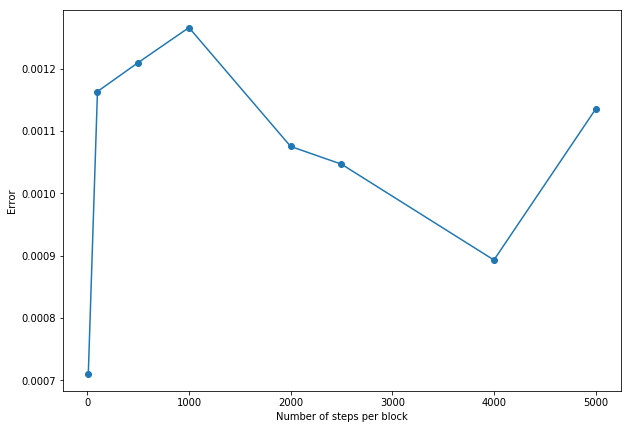

In [21]:
L = np.array([10, 100, 500, 1000, 2000, 2500, 4000, 5000])
M = len(y_e)
N = M/L
errors = np.zeros(len(L))
index=0
for l in L:
    n = int(M/l)
    avg = np.zeros(n)
    err = np.zeros(n)
    for i_blk in range(n):
        for i_stp in range(l):
            #print("l: " +str(l)+" | n: "+str(n)+" | index: "+str(i_blk*l+i_stp))
            avg[i_blk]+=y_e[(i_blk*l+i_stp)]
        avg[i_blk] = avg[i_blk]/l
    for i in range(n):
        accumulate = 0
        accumulate_2 = 0
        for j in range(i+1):
            accumulate = accumulate + avg[j]
            accumulate_2 = accumulate_2 + avg[j]**2
        glob_avg = accumulate/(i+1)
        glob_avg_2 = accumulate_2/(i+1)
        err = np.sqrt((glob_avg_2 - glob_avg**2)/(i+1))
    #print("error #" +str(index+1)+" is: "+str(err))
        
    errors[index]=err
    index+=1

plt.figure(num=None, figsize=(10, 7))

plt.plot(L,errors, linestyle='-', marker='o')
plt.xlabel("Number of steps per block")
plt.ylabel("Error")
#print(errors)
plt.show()

### Liquid

Energy exp-fit parameter: 
[0.10404409]
Pressure exp-fit parameter: 
[0.07634873]


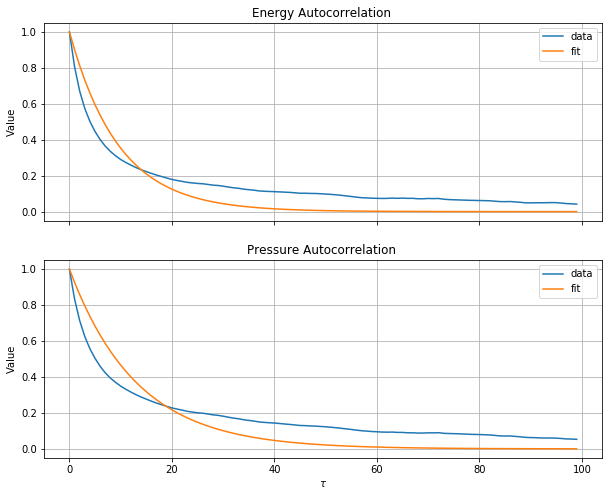

In [22]:
e = np.loadtxt("Liquido/output.epot.0")
p = np.loadtxt("Liquido/output.pres.0")

y_e = e[:,1]
y_p = p[:,1]

acU = []
acP = []
for tau in range(100):
        acU.append(AutoCorrelation(y_e,tau))
        acP.append(AutoCorrelation(y_p,tau))

x = np.arange(len(acU))
p_opt, p_cov = curve_fit(f, x, acU)
print("Energy exp-fit parameter: ")
print(p_opt)
fit = f(x,p_opt)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=False,
                        tight_layout=False)
  
axs[0].plot(x,acU, label="data") # plotting noisy data
axs[0].plot(x,fit, label="fit") # plotting fitted function

p_optp, p_covp = curve_fit(f, x, acP)
print("Pressure exp-fit parameter: ")
print(p_optp)
fit = f(x,p_optp)

axs[1].plot(x,acP, label="data") # plotting noisy data
axs[1].plot(x,fit, label="fit") # plotting fitted function

#axs[0].set_xlabel(r'$\tau$')
axs[0].set_ylabel('Value')
axs[1].set_xlabel(r'$\tau$')
axs[1].set_ylabel('Value')

axs[0].set_title('Energy Autocorrelation ')
axs[1].set_title('Pressure Autocorrelation ')

axs[0].legend()
axs[0].grid(True)
axs[1].legend()
axs[1].grid(True)

plt.show()

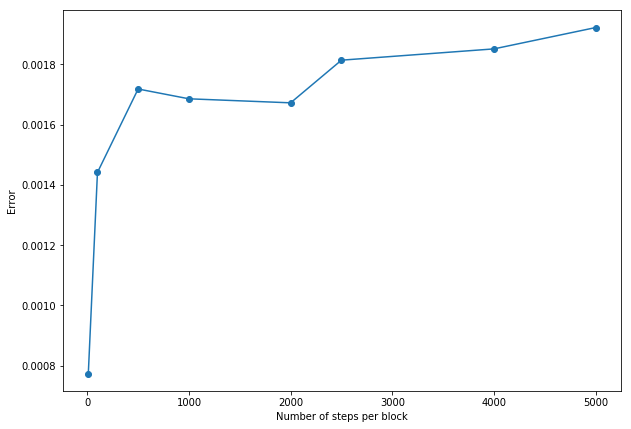

In [24]:
L = np.array([10, 100, 500, 1000, 2000, 2500, 4000, 5000])
M = len(y_e)
N = M/L
errors = np.zeros(len(L))
index=0
for l in L:
    n = int(M/l)
    avg = np.zeros(n)
    err = np.zeros(n)
    for i_blk in range(n):
        for i_stp in range(l):
            #print("l: " +str(l)+" | n: "+str(n)+" | index: "+str(i_blk*l+i_stp))
            avg[i_blk]+=y_e[(i_blk*l+i_stp)]
        avg[i_blk] = avg[i_blk]/l
    for i in range(n):
        accumulate = 0
        accumulate_2 = 0
        for j in range(i+1):
            accumulate = accumulate + avg[j]
            accumulate_2 = accumulate_2 + avg[j]**2
        glob_avg = accumulate/(i+1)
        glob_avg_2 = accumulate_2/(i+1)
        err = np.sqrt((glob_avg_2 - glob_avg**2)/(i+1))
    #print("error #" +str(index+1)+" is: "+str(err))
        
    errors[index]=err
    index+=1

plt.figure(num=None, figsize=(10, 7))

plt.plot(L,errors, linestyle='-', marker='o')
plt.xlabel("Number of steps per block")
plt.ylabel("Error")
#print(errors)
plt.show()

### Gas

Energy exp-fit parameter: 
[0.38166536]
Pressure exp-fit parameter: 
[1.16905083]


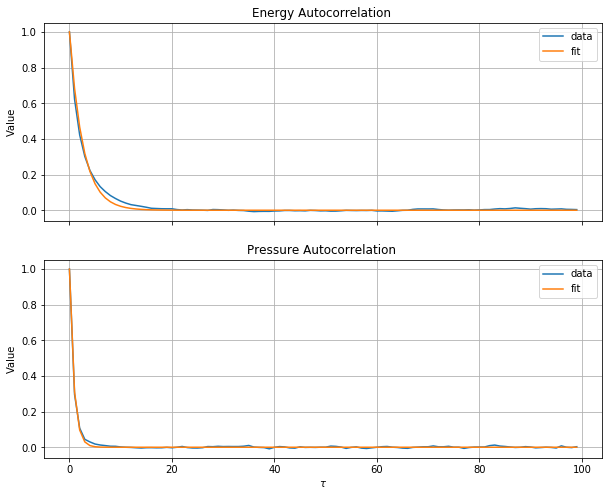

In [25]:
e = np.loadtxt("Gas/output.epot.0")
p = np.loadtxt("Gas/output.pres.0")

y_e = e[:,1]
y_p = p[:,1]

acU = []
acP = []
for tau in range(100):
        acU.append(AutoCorrelation(y_e,tau))
        acP.append(AutoCorrelation(y_p,tau))

x = np.arange(len(acU))
p_opt, p_cov = curve_fit(f, x, acU)
print("Energy exp-fit parameter: ")
print(p_opt)
fit = f(x,p_opt)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=False,
                        tight_layout=False)
  
axs[0].plot(x,acU, label="data") # plotting noisy data
axs[0].plot(x,fit, label="fit") # plotting fitted function

p_optp, p_covp = curve_fit(f, x, acP)
print("Pressure exp-fit parameter: ")
print(p_optp)
fit = f(x,p_optp)

axs[1].plot(x,acP, label="data") # plotting noisy data
axs[1].plot(x,fit, label="fit") # plotting fitted function

#axs[0].set_xlabel(r'$\tau$')
axs[0].set_ylabel('Value')
axs[1].set_xlabel(r'$\tau$')
axs[1].set_ylabel('Value')

axs[0].set_title('Energy Autocorrelation ')
axs[1].set_title('Pressure Autocorrelation ')

axs[0].legend()
axs[0].grid(True)
axs[1].legend()
axs[1].grid(True)

plt.show()

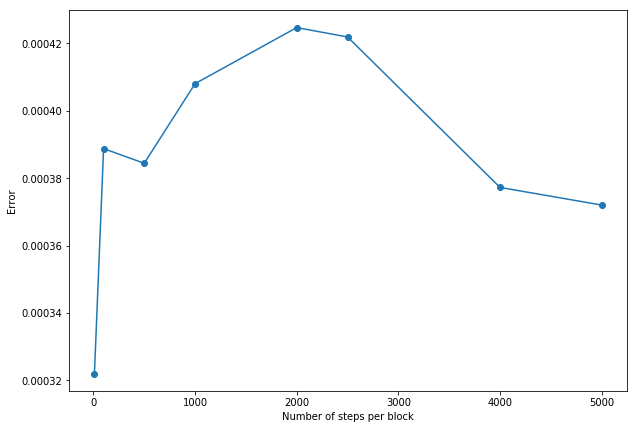

In [26]:
L = np.array([10, 100, 500, 1000, 2000, 2500, 4000, 5000])
M = len(y_e)
N = M/L
errors = np.zeros(len(L))
index=0
for l in L:
    n = int(M/l)
    avg = np.zeros(n)
    err = np.zeros(n)
    for i_blk in range(n):
        for i_stp in range(l):
            #print("l: " +str(l)+" | n: "+str(n)+" | index: "+str(i_blk*l+i_stp))
            avg[i_blk]+=y_e[(i_blk*l+i_stp)]
        avg[i_blk] = avg[i_blk]/l
    for i in range(n):
        accumulate = 0
        accumulate_2 = 0
        for j in range(i+1):
            accumulate = accumulate + avg[j]
            accumulate_2 = accumulate_2 + avg[j]**2
        glob_avg = accumulate/(i+1)
        glob_avg_2 = accumulate_2/(i+1)
        err = np.sqrt((glob_avg_2 - glob_avg**2)/(i+1))
    #print("error #" +str(index+1)+" is: "+str(err))
        
    errors[index]=err
    index+=1

plt.figure(num=None, figsize=(10, 7))

plt.plot(L,errors, linestyle='-', marker='o')
plt.xlabel("Number of steps per block")
plt.ylabel("Error")
#print(errors)
plt.show()

## 7.2 & 7.3

In this section we compare Molecular Dynamics and Monte Carlo methods to evaluate the radial distribution function of our system (and by doing so also we look on how they let the dynamic motion evolve in time).<br>
In the graphs below we compare the Radial Distribution Function obtained through those codes.<br>
They are comparable and within margin of error. 

In [44]:
d_sol = np.loadtxt("MonteCarlo_NVT/GAVE.solid")
d_liq = np.loadtxt("MonteCarlo_NVT/GAVE.liquid")
d_gas = np.loadtxt("MonteCarlo_NVT/GAVE.gas")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)

half_edge_s=0.023
y_ave_s = d_sol[:,1]
y_error_s = d_sol[:,2]

half_edge_l=(5.13/2)/100
y_ave_l = d_liq[:,1]
y_error_l = d_liq[:,2]

half_edge_g=(12.92/2)/100
y_ave_g = d_gas[:,1]
y_error_g = d_gas[:,2]


l = len(y_ave_s)
x = np.arange(l)


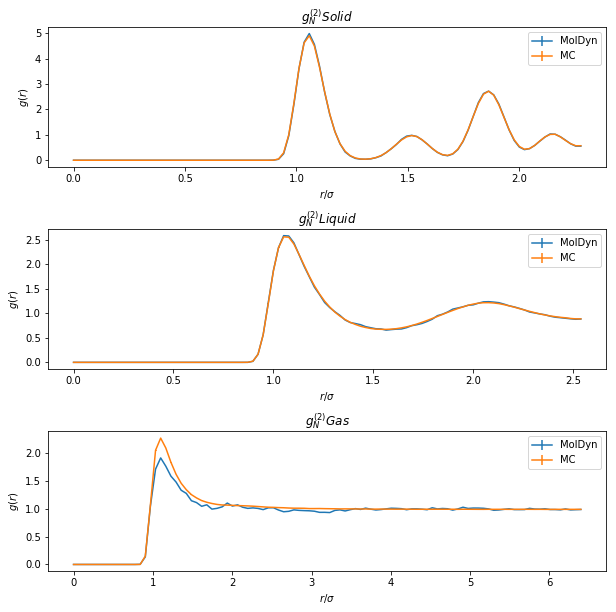

In [43]:
d_sol_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.solid")
d_liq_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.liquid")
d_gas_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.gas")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)

half_edge_s=0.023
y_ave_s_mol = d_sol_mol[:,1]
y_error_s_mol = d_sol_mol[:,2]

half_edge_l_mol=(5.13/2)/100
y_ave_l_mol = d_liq_mol[:,1]
y_error_l_mol = d_liq_mol[:,2]

half_edge_g=(12.92/2)/100
y_ave_g_mol = d_gas_mol[:,1]
y_error_g_mol = d_gas_mol[:,2]


l = len(y_ave_s_mol)
x_mol = np.arange(l)

#print(y_error)

axs[0].errorbar(half_edge_s*x_mol,y_ave_s_mol/100,yerr=y_error_s_mol,label="MolDyn")
axs[1].errorbar(half_edge_l*x_mol,y_ave_l_mol/100,yerr=y_error_l_mol,label="MolDyn")
axs[2].errorbar(half_edge_g*x_mol,y_ave_g_mol/100,yerr=y_error_g_mol,label="MolDyn")
axs[0].errorbar(half_edge_s*x,y_ave_s,yerr=y_error_s,label="MC")
axs[1].errorbar(half_edge_l*x,y_ave_l,yerr=y_error_l,label="MC")
axs[2].errorbar(half_edge_g*x,y_ave_g,yerr=y_error_g,label="MC")

axs[0].set_xlabel(r'$r/\sigma$')
axs[1].set_xlabel(r'$r/\sigma$')
axs[2].set_xlabel(r'$r/\sigma$')

axs[0].set_ylabel(r'$g(r)$')
axs[1].set_ylabel(r'$g(r)$')
axs[2].set_ylabel(r'$g(r)$')

axs[0].set_title(r'$g^{(2)}_N Solid$')
axs[1].set_title(r'$g^{(2)}_N Liquid$')
axs[2].set_title(r'$g^{(2)}_N Gas$')

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.show()

## es7.4

We also show values of U/N and P, computed via data blocking in the Monte Carlo code, for both Argon and Krypton. All the values have then been converted into physical units ([eV] for Energies, [atm] for Pressures and [nm] (in the x-axis) for the radial distribution function).

### Argon

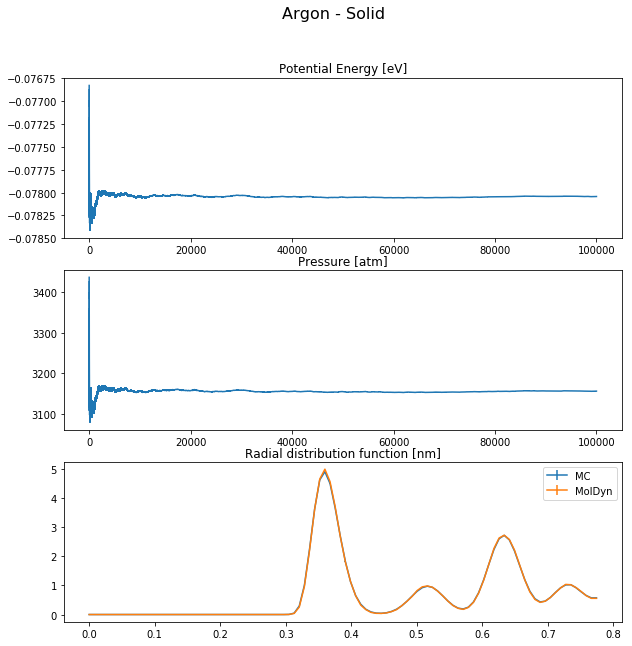

In [42]:
e = np.loadtxt("Solido/output.epot.0")
p = np.loadtxt("Solido/output.pres.0")
d_sol = np.loadtxt("MonteCarlo_NVT/GAVE.solid")
d_sol_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.solid")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
x_e = e[:,0]
x_p = p[:,0]
y_e = e[:,2]
y_p = p[:,2]
y_e_error = e[:,3]
y_p_error = p[:,3]

half_edge_s=0.023
y_ave_s = d_sol[:,1]
y_error_s = d_sol[:,2]
half_edge_s=0.023
y_ave_s_mol = d_sol_mol[:,1]
y_error_s_mol = d_sol_mol[:,2]

l = len(y_ave_s)
x = np.arange(l)
l = len(y_ave_s_mol)
x_mol = np.arange(l)

T0=120
sigma = 0.34
kb = 8.61673324*0.00001

axs[0].errorbar(x_e,y_e*(T0*kb),yerr=y_e_error*(T0*kb))
axs[1].errorbar(x_p,y_p*(T0*1.38064852)/(sigma**3)*(10000/101325),yerr=y_p_error*(T0*1.38064852)/(sigma**3)*(10000/101325))
axs[2].errorbar(half_edge_s*x*sigma,y_ave_s,yerr=y_error_s,label="MC")
axs[2].errorbar(half_edge_s*x_mol*sigma,y_ave_s_mol/100,yerr=y_error_s_mol,label="MolDyn")

axs[0].set_title('Potential Energy [eV]')
axs[1].set_title('Pressure [atm]')
axs[2].set_title('Radial distribution function [nm]')
fig.suptitle('Argon - Solid', fontsize=16)

axs[2].legend()
plt.show()

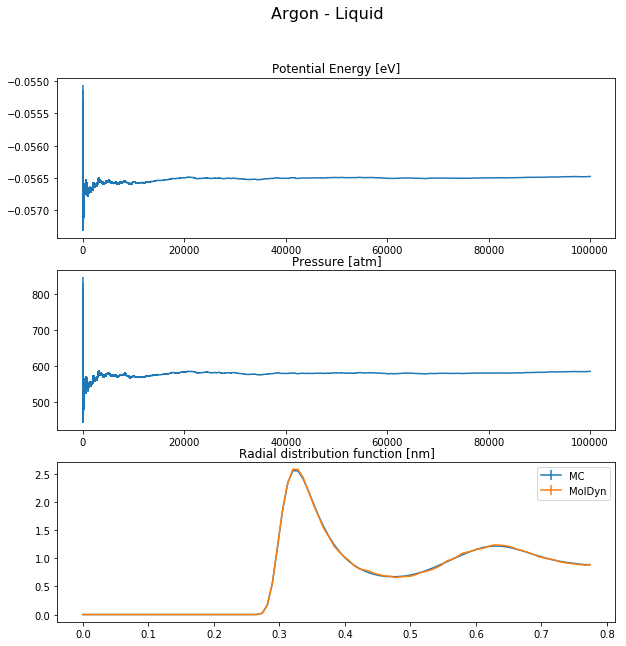

In [43]:
e = np.loadtxt("Liquido/output.epot.0")
p = np.loadtxt("Liquido/output.pres.0")
d_sol = np.loadtxt("MonteCarlo_NVT/GAVE.liquid")
d_sol_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.liquid")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
x_e = e[:,0]
x_p = p[:,0]
y_e = e[:,2]
y_p = p[:,2]
y_e_error = e[:,3]
y_p_error = p[:,3]

half_edge_s=0.023
y_ave_s = d_sol[:,1]
y_error_s = d_sol[:,2]
half_edge_s=0.023
y_ave_s_mol = d_sol_mol[:,1]
y_error_s_mol = d_sol_mol[:,2]

l = len(y_ave_s)
x = np.arange(l)
l = len(y_ave_s_mol)
x_mol = np.arange(l)

T0=120
sigma = 0.34
kb = 8.61673324*0.00001

axs[0].errorbar(x_e,y_e*(T0*kb),yerr=y_e_error*(T0*kb))
axs[1].errorbar(x_p,y_p*(T0*1.38064852)/(sigma**3)*(10000/101325),yerr=y_p_error*(T0*1.38064852)/(sigma**3)*(10000/101325))
axs[2].errorbar(half_edge_s*x*sigma,y_ave_s,yerr=y_error_s,label="MC")
axs[2].errorbar(half_edge_s*x_mol*sigma,y_ave_s_mol/100,yerr=y_error_s_mol,label="MolDyn")

axs[0].set_title('Potential Energy [eV]')
axs[1].set_title('Pressure [atm]')
axs[2].set_title('Radial distribution function [nm]')
fig.suptitle('Argon - Liquid', fontsize=16)

axs[2].legend()
plt.show()

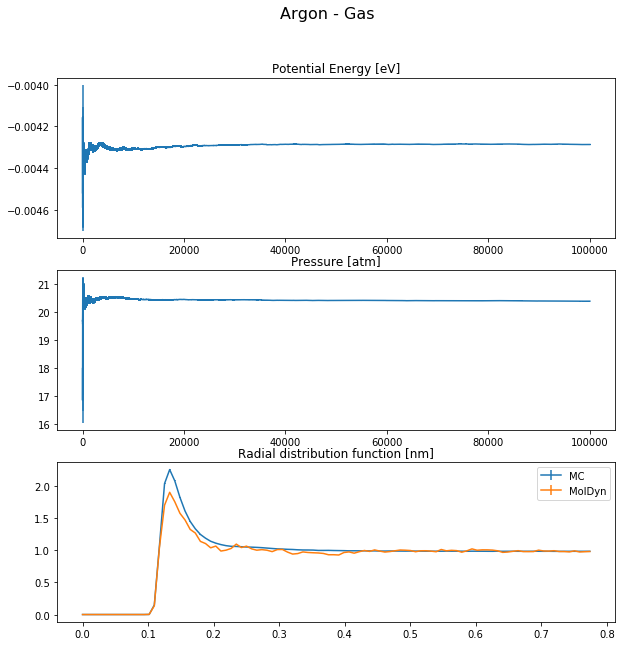

In [44]:
e = np.loadtxt("Gas/output.epot.0")
p = np.loadtxt("Gas/output.pres.0")
d_sol = np.loadtxt("MonteCarlo_NVT/GAVE.gas")
d_sol_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.gas")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
x_e = e[:,0]
x_p = p[:,0]
y_e = e[:,2]
y_p = p[:,2]
y_e_error = e[:,3]
y_p_error = p[:,3]

half_edge_s=0.023
y_ave_s = d_sol[:,1]
y_error_s = d_sol[:,2]
half_edge_s=0.023
y_ave_s_mol = d_sol_mol[:,1]
y_error_s_mol = d_sol_mol[:,2]

l = len(y_ave_s)
x = np.arange(l)
l = len(y_ave_s_mol)
x_mol = np.arange(l)

T0=120
sigma = 0.34
kb = 8.61673324*0.00001

axs[0].errorbar(x_e,y_e*(T0*kb),yerr=y_e_error*(T0*kb))
axs[1].errorbar(x_p,y_p*(T0*1.38064852)/(sigma**3)*(10000/101325),yerr=y_p_error*(T0*1.38064852)/(sigma**3)*(10000/101325))
axs[2].errorbar(half_edge_s*x*sigma,y_ave_s,yerr=y_error_s,label="MC")
axs[2].errorbar(half_edge_s*x_mol*sigma,y_ave_s_mol/100,yerr=y_error_s_mol,label="MolDyn")

axs[0].set_title('Potential Energy [eV]')
axs[1].set_title('Pressure [atm]')
axs[2].set_title('Radial distribution function [nm]')
fig.suptitle('Argon - Gas', fontsize=16)

axs[2].legend()
plt.show()

### Krypton

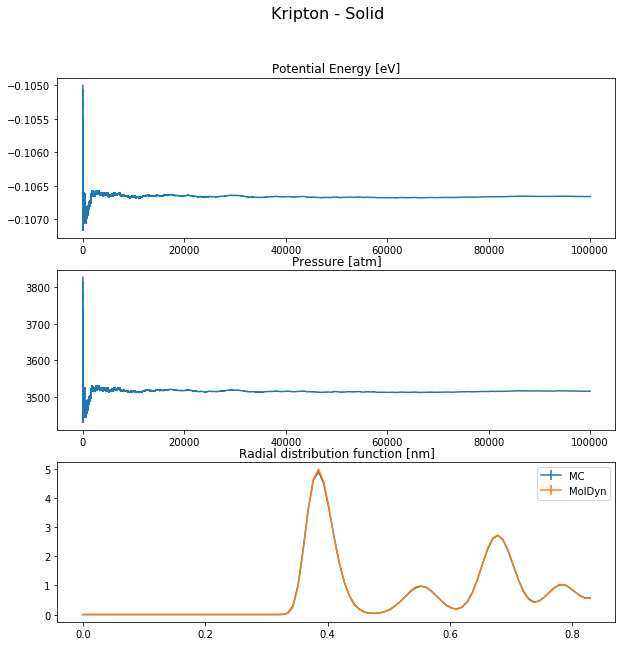

In [45]:
e = np.loadtxt("Solido/output.epot.0")
p = np.loadtxt("Solido/output.pres.0")
d_sol = np.loadtxt("MonteCarlo_NVT/GAVE.solid")
d_sol_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.solid")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
x_e = e[:,0]
x_p = p[:,0]
y_e = e[:,2]
y_p = p[:,2]
y_e_error = e[:,3]
y_p_error = p[:,3]

half_edge_s=0.023
y_ave_s = d_sol[:,1]
y_error_s = d_sol[:,2]
half_edge_s=0.023
y_ave_s_mol = d_sol_mol[:,1]
y_error_s_mol = d_sol_mol[:,2]

l = len(y_ave_s)
x = np.arange(l)
l = len(y_ave_s_mol)
x_mol = np.arange(l)

T0=164
sigma = 0.364
kb = 8.61673324*0.00001

axs[0].errorbar(x_e,y_e*(T0*kb),yerr=y_e_error*(T0*kb))
axs[1].errorbar(x_p,y_p*(T0*1.38064852)/(sigma**3)*(10000/101325),yerr=y_p_error*(T0*1.38064852)/(sigma**3)*(10000/101325))
axs[2].errorbar(half_edge_s*x*sigma,y_ave_s,yerr=y_error_s,label="MC")
axs[2].errorbar(half_edge_s*x_mol*sigma,y_ave_s_mol/100,yerr=y_error_s_mol,label="MolDyn")

axs[0].set_title('Potential Energy [eV]')
axs[1].set_title('Pressure [atm]')
axs[2].set_title('Radial distribution function [nm]')
fig.suptitle('Kripton - Solid', fontsize=16)

axs[2].legend()
plt.show()

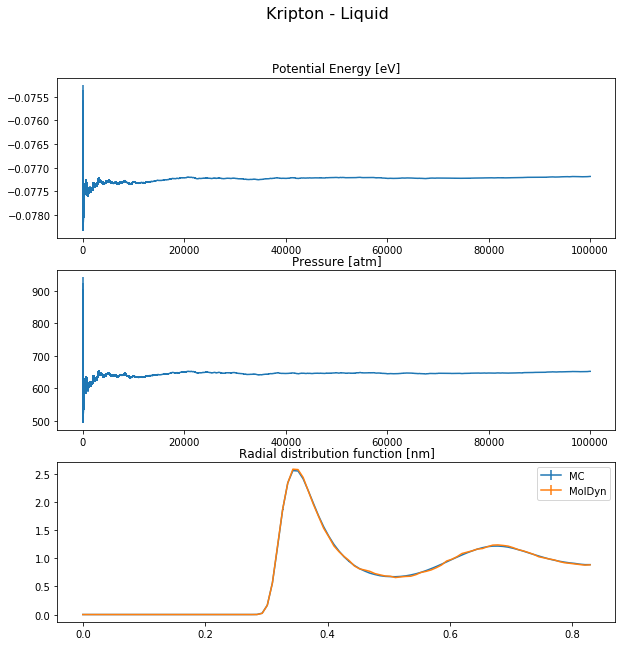

In [46]:
e = np.loadtxt("Liquido/output.epot.0")
p = np.loadtxt("Liquido/output.pres.0")
d_sol = np.loadtxt("MonteCarlo_NVT/GAVE.liquid")
d_sol_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.liquid")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
x_e = e[:,0]
x_p = p[:,0]
y_e = e[:,2]
y_p = p[:,2]
y_e_error = e[:,3]
y_p_error = p[:,3]

half_edge_s=0.023
y_ave_s = d_sol[:,1]
y_error_s = d_sol[:,2]
half_edge_s=0.023
y_ave_s_mol = d_sol_mol[:,1]
y_error_s_mol = d_sol_mol[:,2]

l = len(y_ave_s)
x = np.arange(l)
l = len(y_ave_s_mol)
x_mol = np.arange(l)

T0=164
sigma = 0.364
kb = 8.61673324*0.00001

axs[0].errorbar(x_e,y_e*(T0*kb),yerr=y_e_error*(T0*kb))
axs[1].errorbar(x_p,y_p*(T0*1.38064852)/(sigma**3)*(10000/101325),yerr=y_p_error*(T0*1.38064852)/(sigma**3)*(10000/101325))
axs[2].errorbar(half_edge_s*x*sigma,y_ave_s,yerr=y_error_s,label="MC")
axs[2].errorbar(half_edge_s*x_mol*sigma,y_ave_s_mol/100,yerr=y_error_s_mol,label="MolDyn")

axs[0].set_title('Potential Energy [eV]')
axs[1].set_title('Pressure [atm]')
axs[2].set_title('Radial distribution function [nm]')
fig.suptitle('Kripton - Liquid', fontsize=16)

axs[2].legend()
plt.show()

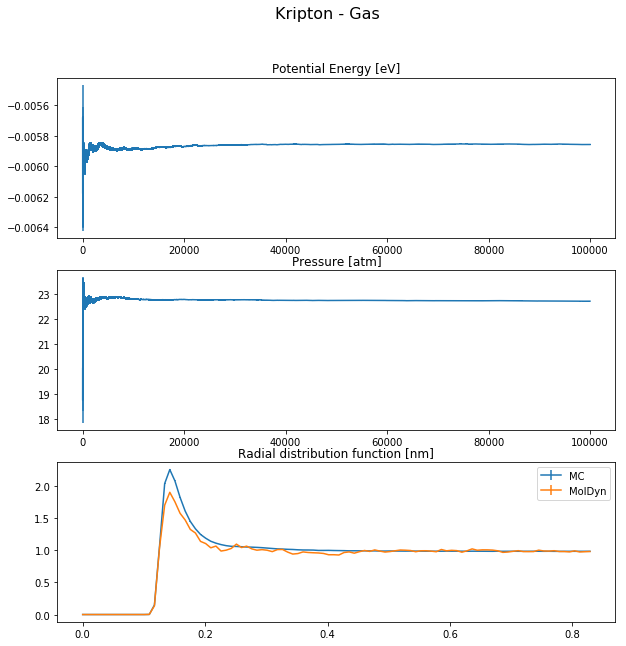

In [47]:
e = np.loadtxt("Gas/output.epot.0")
p = np.loadtxt("Gas/output.pres.0")
d_sol = np.loadtxt("MonteCarlo_NVT/GAVE.gas")
d_sol_mol = np.loadtxt("MonteCarlo_NVT/es7.3/GAVE.gas")

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=False, sharey=False,
                        tight_layout=False)
x_e = e[:,0]
x_p = p[:,0]
y_e = e[:,2]
y_p = p[:,2]
y_e_error = e[:,3]
y_p_error = p[:,3]

half_edge_s=0.023
y_ave_s = d_sol[:,1]
y_error_s = d_sol[:,2]
half_edge_s=0.023
y_ave_s_mol = d_sol_mol[:,1]
y_error_s_mol = d_sol_mol[:,2]

l = len(y_ave_s)
x = np.arange(l)
l = len(y_ave_s_mol)
x_mol = np.arange(l)

T0=164
sigma = 0.364
kb = 8.61673324*0.00001

axs[0].errorbar(x_e,y_e*(T0*kb),yerr=y_e_error*(T0*kb))
axs[1].errorbar(x_p,y_p*(T0*1.38064852)/(sigma**3)*(10000/101325),yerr=y_p_error*(T0*1.38064852)/(sigma**3)*(10000/101325))
axs[2].errorbar(half_edge_s*x*sigma,y_ave_s,yerr=y_error_s,label="MC")
axs[2].errorbar(half_edge_s*x_mol*sigma,y_ave_s_mol/100,yerr=y_error_s_mol,label="MolDyn")

axs[0].set_title('Potential Energy [eV]')
axs[1].set_title('Pressure [atm]')
axs[2].set_title('Radial distribution function [nm]')
fig.suptitle('Kripton - Gas', fontsize=16)

axs[2].legend()
plt.show()